<a href="https://colab.research.google.com/github/BacusLR/sales-predictions/blob/main/Bacus__Data_Visualization_Core_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization Core [Starter Notebook]

- Student Name: Lorincio R Bacus Jr

## Import Packages and Load Data

In [ ]:
# import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Save the filepath to the data as a variable "fpath"
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/insurance_mod.csv'

In [ ]:
# Read in the file and disply the info and head
insviz_df = pd.read_csv(fpath)
insviz_df.info()
insviz_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0


## Explore Correlation

### 1\) Correlation Heatmap

1a) Define a variable containing the correlations between variables in the insurance dataset.

In [ ]:
# Find correlations
corr = insviz_df.corr(numeric_only = True)
corr.round(2)


,age,bmi,children,smoker,charges
age,1.00,0.11,0.04,-0.03,0.30
bmi,0.11,1.00,0.01,0.00,0.20
children,0.04,0.01,1.00,0.01,0.07
smoker,-0.03,0.00,0.01,1.00,0.79
charges,0.30,0.20,0.07,0.79,1.00


1b) Make a heatmap of the correlations and annote with the values.

[Text(0.5, 1.0, 'Correlation Greenmap')]

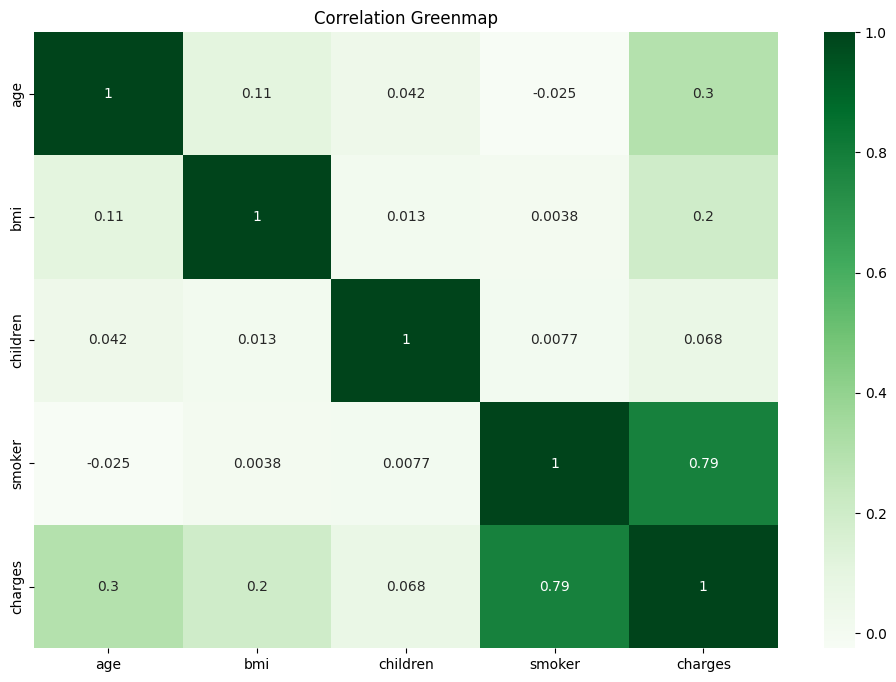

In [ ]:
# Make a heatmap using the correlations from above
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, cmap = 'Greens', annot = True);
ax.set(title ='Correlation Greenmap')

1c) **Are there arny strong correlations?
Is it a positive or negative correlation?**

- Your Answer:
  - `age and charges has a positive correlation`


## Explore Charges vs. Smokers

### 2\) Barplot - Charges for Smokers vs. Non-Smokers

2a) Make a barplot to visualize the mean of charges for smokers and nonsmokers.

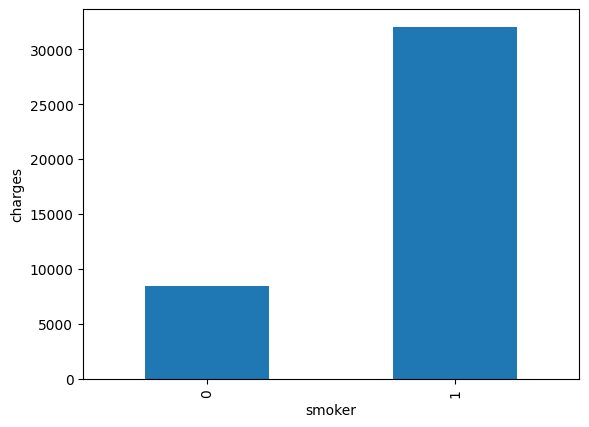

In [ ]:
# Make a barplot of smoker vs charges
smoker_charges = insviz_df.groupby('smoker')['charges'].mean()
smoker_charges

ax = smoker_charges.plot(kind='bar')
ax.set_ylabel("charges")
ax.set_xlabel("smoker");

2b) Is the mean of charges higher for smokers or nonsmokers? ((In a future course, you will explore how to calculate the statistical significance of this difference)

- Your Answer:
  -  `Charges are higher for smokers`

### 3\) Boxplot - Charges for Smokers vs. Non-Smokers


3a) Create a boxplot with x as smokers and y as charges.


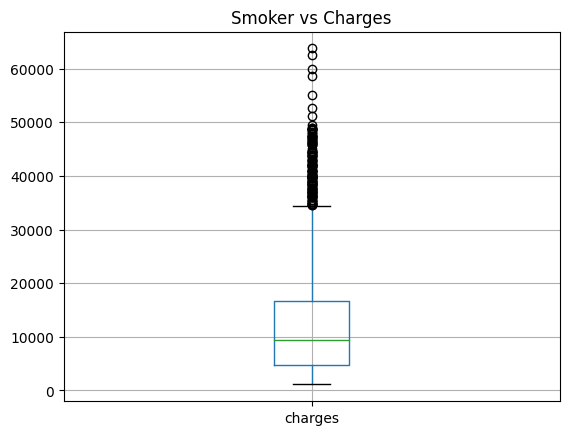

In [ ]:
# Create a boxplot of smoker vs. charges
ax = insviz_df.boxplot(column = 'charges')
ax.set_title('Smoker vs Charges');


3b) What information does this include that you could not see in your bar chart?
- Answer(s):
  - `We now know the minimum, median, and maximum values`

## Explore Charges for Males vs. Females

### 4\) Barplot - Charges for Males vs. Females

4a) Make a searborn barplot to visualize the difference in charges between males and females.

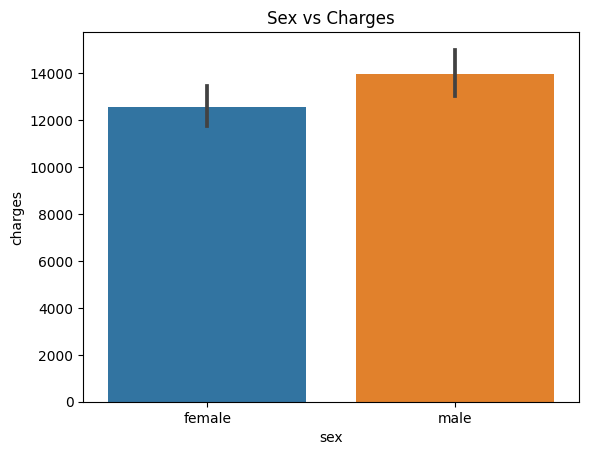

In [ ]:
# Make a barplot of sex vs. charges
ax = sns.barplot(data = insviz_df, x = 'sex', y = 'charges')
ax.set_title('Sex vs Charges');

4b)  Is the mean of charges higher for males or females?

- Your Answer:
  - `females is slightly higher`

### 5\) Grouped Barplot - Charges by Sex and Smoker

5a\) Create a seaborn barplot to visualize the diference between insurance charges grouped by Smoker (on the x-axis), and Sex (the hue).

[Text(0.5, 1.0, 'Smokers vs Nonsmokers')]

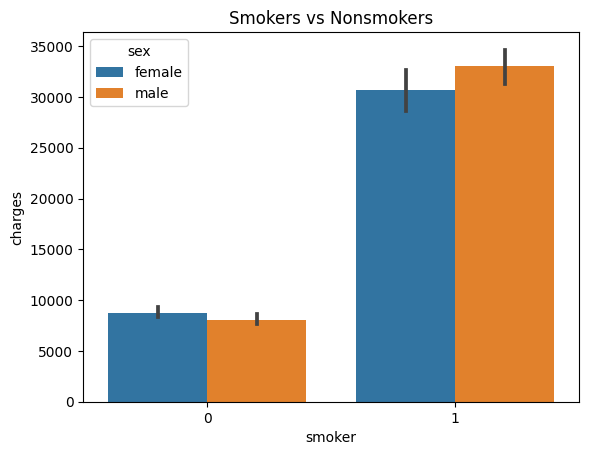

In [ ]:
# Create a barplot of smoker vs charges, colored by sex
ax = sns.barplot(data = insviz_df, x = 'smoker', y = 'charges', hue = 'sex');
ax.set(title ='Smokers vs Nonsmokers')

5b\) What do you observe? Which of the 4 groups has the highest average charges?
- Your Answer:
  - `male smokers`

## Explore Age vs. Charges

### 6\) Scatter Plot - Age vs. Charges

6a) Make a scatterplot to visualize the relationship between charges and age for the entire dataset

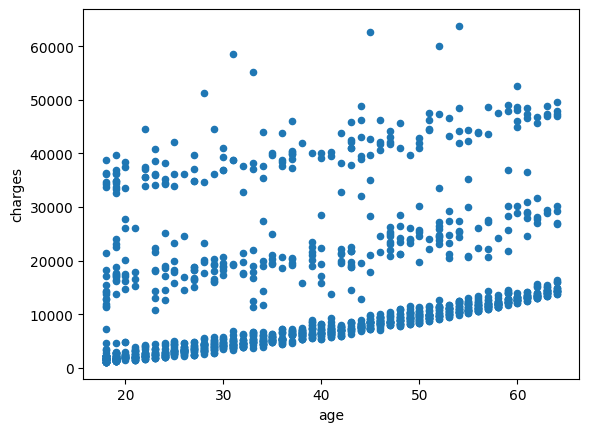

In [ ]:
# Create a scatter plot of age vs charges
ax = insviz_df.plot(kind='scatter', x='age', y='charges');

6b) Desribe what you notice from the visualization.
- Your Answer:
  - `as age goes up charges go up`

### 7\)  Grouped Scatter Plot - Age vs. Charges, colored by Smoker

7a) Make a scatterplot to visualize the relationship between charges and age, but colored by smoker or not.

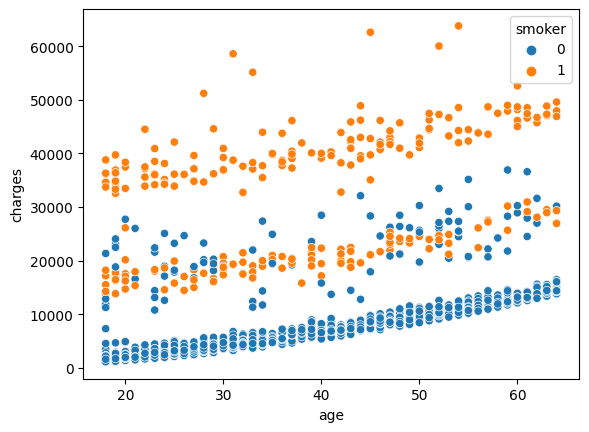

In [ ]:
# make another scatterplot of age vs charges, but colored by smoker
# (using seaborn will make this easy)
ax = sns.scatterplot(data = insviz_df, x = 'age', y = 'charges', hue = 'smoker');

7b) Desribe what you notice from the visualization.

- Your Answer:
  - `nonsmokers are charged less overall`

### 8\) Grouped Scatter Plot - Age vs. Charges, colored by Sex

8a) Make a scatterplot to visualize the relationship between charges and age, but colored by sex.

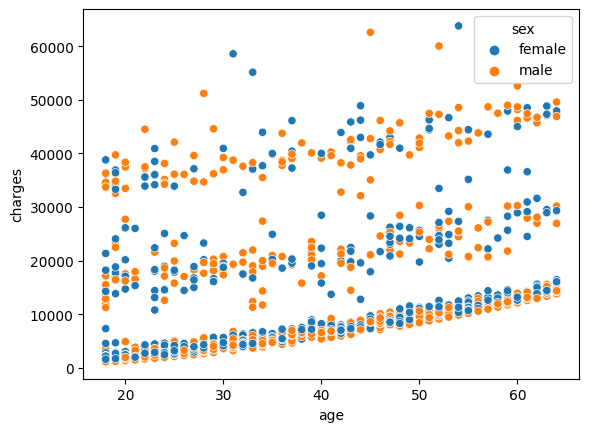

In [ ]:
# make another scatterplot of charges vs age, but this time color the dots by sex
ax = sns.scatterplot(data = insviz_df, x = 'age', y = 'charges', hue = 'sex');

8b) Describe what you notice from the visualization

- Your Answer:
  - `as age goes up charges go up regardless of sex`

## Explore BMI

### 9\) Regplot - Charges vs. BMI

9a) Make a seaborn regplot to visualize the relationship between charges and bmi for the entire dataset

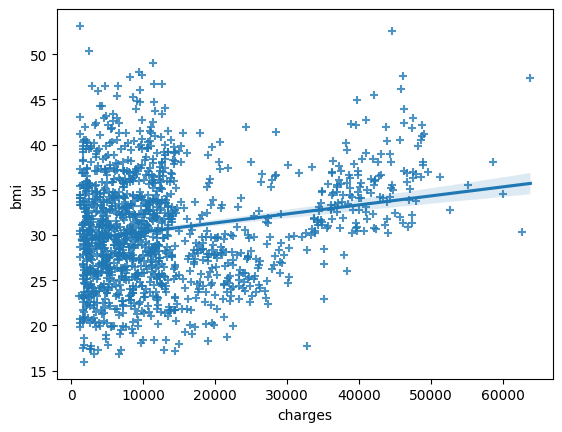

In [ ]:
# Make a seaborn regplot for bmi vs. charges.
ax = sns.regplot(data = insviz_df, x = 'charges', y = 'bmi', marker = '+');

9b\) What do you notice from the visualization? *(There are many correct answers.)*

- Your Answer:
  - ' regression line looks like its going up, there is a lot more frequency in values on left side than on right side of plot '

### 10\) Scatterplot - Charges vs. BMI - Colored by Smoker

10a) Make a scatterplot to visualize the relationship between charges and bmi colored by smoker or not

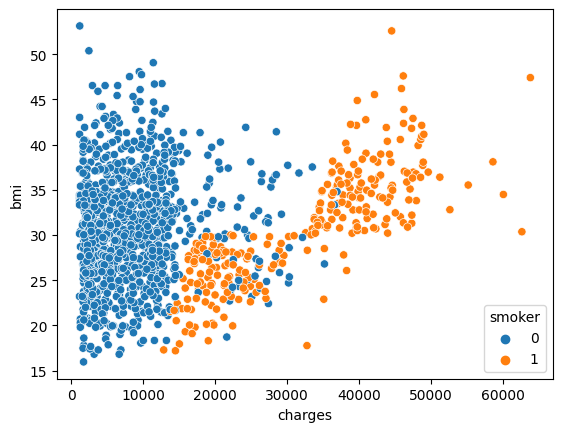

In [ ]:
# Make a scatterplot of bmi vs charges, colored by smoker
ax = sns.scatterplot(data = insviz_df, x = 'charges', y = 'bmi', hue = 'smoker');

10b) What do you notice from the visualization? (There are many correct answers.)

- Your Answer:
  - `Smokers incure the most charges`

### 11\)  Linear Model Plot - Charges vs. BMI - Colored by Smoker



11a) Compare the relationship of bmi and charges for smokers and nonsmokers using seaborn's `lmplot` to calculate a separate trendline for Smokers vs. Non-Smokers.


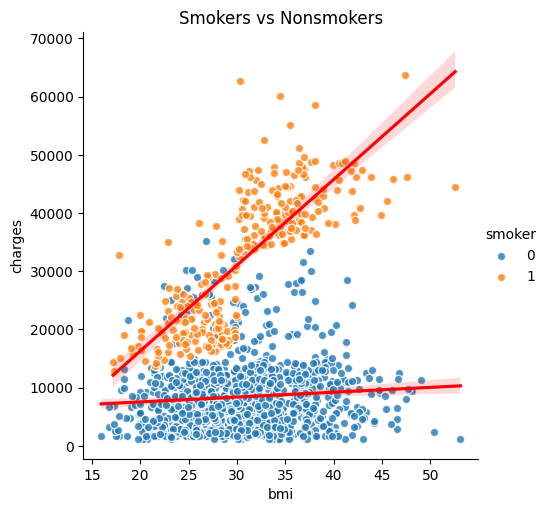

In [ ]:
# Create an lmplot of bmi vs. charges, colored by smoker.
scatter_kws = dict(edgecolor = 'white')
line_kws = dict(color = 'red')
fg = sns.lmplot(data = insviz_df, x = 'bmi', y = 'charges', hue = 'smoker', line_kws = line_kws, scatter_kws = scatter_kws,)
fg.ax.set_title('Smokers vs Nonsmokers');

11b) What do you notice from the visualization? (Compare the trendlines.)

- Your Answer:
  - `Smokers have higher charges than non smokers`

## Explore Regions

### 12\) Countplot for Regions

12a) Make a countplot to show how many customers per region.

In [ ]:
insviz_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16885.0
1,18,male,33.770,1,0,southeast,1726.0
2,28,male,33.000,3,0,southeast,4449.0
3,33,male,22.705,0,0,northwest,21984.0
4,32,male,28.880,0,0,northwest,3867.0
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10601.0
1334,18,female,31.920,0,0,northeast,2206.0
1335,18,female,36.850,0,0,southeast,1630.0
1336,21,female,25.800,0,0,southwest,2008.0


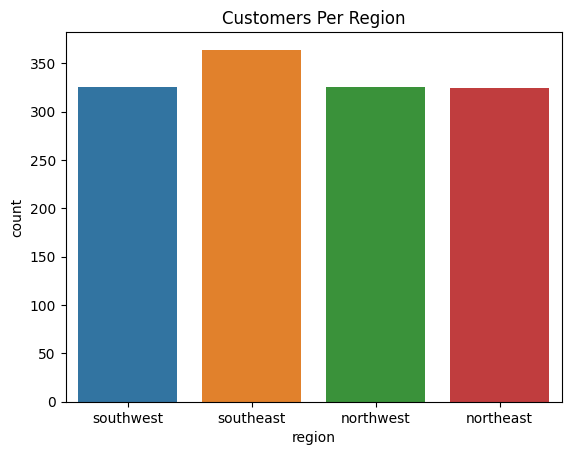

In [ ]:
# Make a countplot for region
ax = sns.countplot(data= insviz_df, x= 'region')
ax.set_title('Customers Per Region');

12b) Which region appears the most in this data set?

- Your Answer:
  - `southeast region has the most`

### 13\) Barplot of Charges by Region

13a) Make a barplot to show average charges by region.

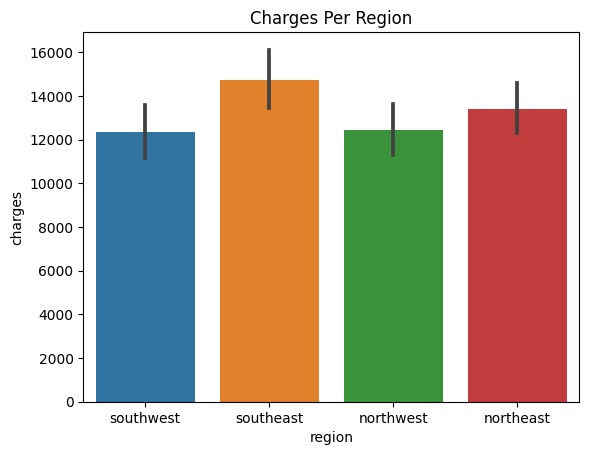

In [ ]:
# make a barplot of charges by region
ax = sns.barplot(data= insviz_df, x= 'region', y= 'charges')
ax.set_title('Charges Per Region');

13b) Which region has the highest average charges?

- Your Answer:
  - `Southeast has the highest average charges`

### 14\) Bar Chart of Ratios (%) of Smokers in Each Region

14a) Calculate the ratio of smokers in each region and save it as a variable called "percent_smoker_by_region". (Hint: use .groupby with "region" combined with slicing the "smoker" column and end with .mean() )

In [ ]:
# use groupby to get the mean of smoker grouped by region
percent_smoker_by_region = insviz_df.groupby('region')['smoker'].mean()
percent_smoker_by_region

region
northeast    0.206790
northwest    0.178462
southeast    0.250000
southwest    0.178462
Name: smoker, dtype: float64

14b) Plot the ratios of smokers by region as a bar plot.



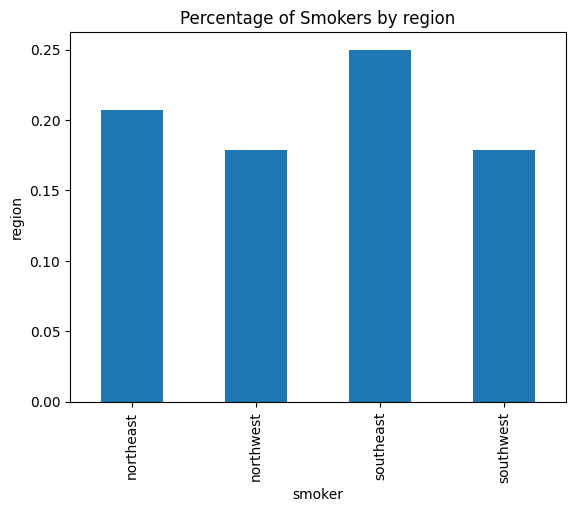

In [ ]:
# Plot the ratios (the results of then groupby above)
ax = percent_smoker_by_region.plot(kind='bar')
ax.set_ylabel('region')
ax.set_xlabel('smoker')
ax.set_title('Percentage of Smokers by region');

14c) Which region has the highest ratio of smokers?

- Your Answer:
  - `Southeast has highest percentage`

> You've completed the assignment! Download your notebook and upload it as your submission.